# LAB4: Algorytmy grafowe – najkrótsza ścieżka w grafie

# Zadanie 1
Implementacje algorytmów poszukiwania najkrótszej ścieżki w grafie:
* Dijkstry

In [2]:
from typing import List, Dict, Tuple, Set
import networkx as nx
import matplotlib.pyplot as plt

edge = Tuple[int, int]
graph = Dict[int, List]
inf = float('inf')

def Dijkstra(G: graph, a: List[List[int]], s: int) -> Tuple[int, List[int]]:
    """
    Alorytm zwracający najkrótsza ścieżkę w grafie "G", od danego wierzechołka "s".
    Alorytm zwraca krotkę, zawierającą długość tej ścieżki oraz kolejne wierzchołki przez, które przechodzi
    """
    d = {v: inf for v in G} #inicjalizacja słowniak z aktualnymi kosztami osiągnięcia wierzechołka s
    p = {v : -1 for v in G} # słownik poprzeników wierzechołków
    Q = set(G.keys()) #zbiór wierzchołków nieuwględnionych w ścieżce
    path = [] #lista, która będzie zawirała kolejne odwiedzone wierzchołki
    
    Q.remove(s) #usunięcie ze zbioru nieodwiedzonych wierzchołków wierzechołka startowego
    path.append(s) #dodanie startowego wierzchołka do listy odwiedzonych
    d[s] = 0 #ustawienie kosztu startowego wierzchołka na 0
    u_prev = s #ustawienie poprzedniego wierzcholka na ten startowy
    while Q: #wykonywanie dopóki nie odwiedzimy wszystkich wierzchołków
        for vert in Q:
            for u in G[u_prev]: #pętle iterujące przez każdy wierzchołek nieodwiedzony znajdujący się w liście sąsiedztwa u
                if d[u_prev] + a[u_prev][u] < d[u]: #aktualizacja najmniejszego kosztu dojscia do wierzchołka u
                    d[u] = d[u_prev] + a[u_prev][u]
                    p[u] = u_prev
                    
        prev_min = inf #usawienie zmiennej minimum do poszukiwania minimalnej wagi w liscie beta, innej od 0 (wierzchołek startowy)
        for u in Q:     #poszukiwanie minimum 
            if d[u] < prev_min: #jeżeli wartość wagi dla wierzchołka u bedzie mniejsza niz poprzednia znaleziona
                prev_min = d[u] #zamieniamy poprzednie minimum na nowe
                u_prev = u #ustawiamy poprzedni wierzchołek na u
        Q.remove(u_prev) #usunięcie poprzedniego wierzchłka z listy nieodwiedzonych
        path.append(u_prev) #dodanie wierzchołka do odwiedzonych 
        
    return  d[u_prev], path #zwrot wartości ścieżki oraz jej sekwencja
 
    

In [3]:
graph = {
    0: [1, 2, 3, 4],
    1: [0, 3, 6, 8],
    2: [0, 3, 4, 5],
    3: [0, 1, 2, 5, 6],
    4: [0, 2, 5],
    5: [2, 3, 4, 6],
    6: [1, 3, 5],
    7: [8,9],
    8: [1,7],
    9: [7]
}

a = [[inf, 2, 1, 4, 3, inf, inf, inf, inf, inf],
    [2, inf, inf, 3, inf, inf, 5, inf, 1, inf],
    [1, inf, inf, 7, 1, 2, inf, inf, inf, inf],
    [4, 3, 7, inf, inf, 4, 4, inf, inf, inf],
    [3, inf, 1, inf, inf, 3, inf, inf, inf, inf],
    [inf, inf, 2, 4, 3, inf, 3, inf, inf, inf],
    [inf, 5, inf, 4, inf, 3, inf, inf, inf, inf],
    [inf,inf,inf,inf,inf,inf,inf,inf, 8, 9],
    [inf,1,inf,inf,inf,inf,inf,8, inf,inf],
    [inf,inf,inf,inf,inf,inf,inf, 9,inf,inf]
]

def info_graph(graph, weights, title=''):
    G = nx.Graph(graph)
    for u, v in G.edges:
        G.edges[u, v]['weight'] = weights[u][v]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()


### Przykład dla grafu spójnego z dodatnimi wagami

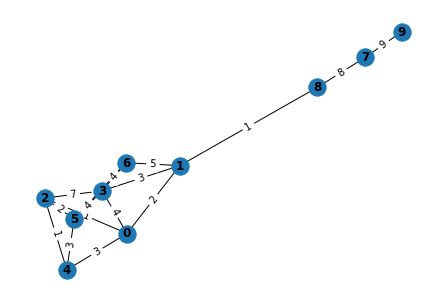

Dlugosc sciezki: 23, kolejne wierzchołki: [9, 7, 8, 1, 0, 2, 3, 4, 5, 6]


In [4]:
info_graph(graph, a)
d, path = Dijkstra(graph, a, 9)
print(f'Dlugosc sciezki: {d}, kolejne wierzchołki: {path}')

## Zadanie 2
Z punktu widzenia algorytmi Dijkstry istotne są wagi dodatnie. Graf z wagami ujemnymi należy obsługiwać algorytmem np. Bellmana-Forda lub Floyda-Warshalla. Podobnie jak w przypadku poszukiwania MST, ważne jest także aby graf był spójny, gydż w przeciwnym przypadku algorytm po odnalezieniu minimalnej ścieżki w jednej części nie zostanie przypisany nowy wierzchołek z innej niespójnej części, więc w kolejnej interacji będzie podjęta próba ponownego usunięcia go.

* Graf z ujemnymi wagami

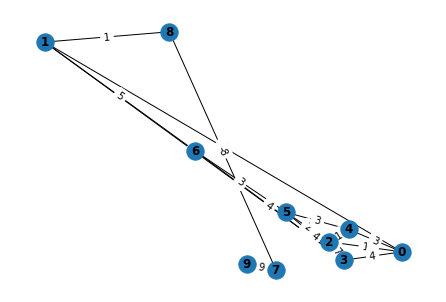

Dlugosc sciezki: 3, kolejne wierzchołki: [9, 7, 8, 1, 3, 0, 2, 4, 5, 6]


In [5]:
graph = {
    0: [1, 2, 3, 4],
    1: [0, 3, 6, 8],
    2: [0, 3, 4, 5],
    3: [0, 1, 2, 5, 6],
    4: [0, 2, 5],
    5: [2, 3, 4, 6],
    6: [1, 3, 5],
    7: [8,9],
    8: [1,7],
    9: [7]
}

a = [[inf, -2, 1, 4, 3, inf, inf, inf, inf, inf],
    [-2, inf, inf, -3, inf, inf, 5, inf, 1, inf],
    [1, inf, inf, 7, 1, 2, inf, inf, inf, inf],
    [4, -3, 7, inf, inf, 4, 4, inf, inf, inf],
    [3, inf, 1, inf, inf, 3, inf, inf, inf, inf],
    [inf, inf, 2, 4, 3, inf, 3, inf, inf, inf],
    [inf, 5, inf, 4, inf, 3, inf, inf, inf, inf],
    [inf,inf,inf,inf,inf,inf,inf,inf, -8, 9],
    [inf,1,inf,inf,inf,inf,inf,-8, inf,inf],
    [inf,inf,inf,inf,inf,inf,inf, 9,inf,inf]
]

info_graph(graph, a)
d, path = Dijkstra(graph, a, 9)
print(f'Dlugosc sciezki: {d}, kolejne wierzchołki: {path}')

* Graf niespójny

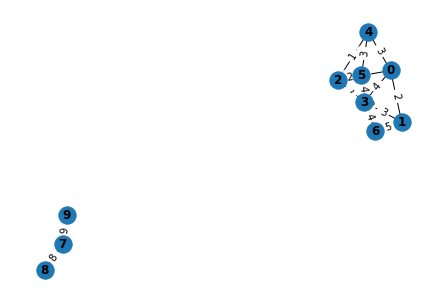

KeyError: 8

In [6]:
graph = {
    0: [1, 2, 3, 4],
    1: [0, 3, 6],
    2: [0, 3, 4, 5],
    3: [0, 1, 2, 5, 6],
    4: [0, 2, 5],
    5: [2, 3, 4, 6],
    6: [1, 3, 5],
    7: [8,9],
    8: [7],
    9: [7]
}

a = [[inf, 2, 1, 4, 3, inf, inf, inf, inf, inf],
    [2, inf, inf, 3, inf, inf, 5, inf, inf, inf],
    [1, inf, inf, 7, 1, 2, inf, inf, inf, inf],
    [4, 3, 7, inf, inf, 4, 4, inf, inf, inf],
    [3, inf, 1, inf, inf, 3, inf, inf, inf, inf],
    [inf, inf, 2, 4, 3, inf, 3, inf, inf, inf],
    [inf, 5, inf, 4, inf, 3, inf, inf, inf, inf],
    [inf,inf,inf,inf,inf,inf,inf,inf, 8, 9],
    [inf,inf,inf,inf,inf,inf,inf,8, inf,inf],
    [inf,inf,inf,inf,inf,inf,inf, 9,inf,inf]
]

info_graph(graph, a)
d, path = Dijkstra(graph, a, 9)
print(f'Dlugosc sciezki: {d}, kolejne wierzchołki: {path}')

Jak widać powyżej został zwrócony błąd, o którym była mowa na początku zadania 2.

## Zadanie 3 Złożoność obliczeniowa
Oznaczenia: V-liczba wierzchołków, E-liczba krawędzi
W przypadku algorutmu Dijkstry o złożoności obliczeniowej decyduje sposób implementacji wyboru następnego wierzchołka prowadzącego przez krawędź o najmniejszej wadze. 
* Może się to odbywać poprzez naiwne iterowanie w poszukiwaniu minimalej wagi (jak wyżej) wtedy złożoność O(V<sup>2</sup>)
* Wybrać możemy także strukturę taką jak minHeap - kolejka priorytetowa z najmniejszą wagą na początku - O(ElogV)

W zalezności czy mamy doczynienia z grafem rzadkim (optymistyczny przypadek), wtedy pierwszy wariant jest optymalny. W przypadku pesymistycnzym, gdy graf jest gęsty lepiej sprawdza sę druga opcja. 


### Algorytm Floyda-Warshalla

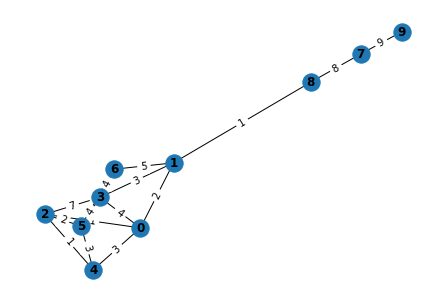

Droga z 9 do 4: [9, 7, 8, 1, 0, 2, 4] o wartosci 22


In [19]:
graph = {
    0: [1, 2, 3, 4],
    1: [0, 3, 6, 8],
    2: [0, 3, 4, 5],
    3: [0, 1, 2, 5, 6],
    4: [0, 2, 5],
    5: [2, 3, 4, 6],
    6: [1, 3, 5],
    7: [8,9],
    8: [1,7],
    9: [7]
}

a = [[inf, 2, 1, 4, 3, inf, inf, inf, inf, inf],
    [2, inf, inf, 3, inf, inf, 5, inf, 1, inf],
    [1, inf, inf, 7, 1, 2, inf, inf, inf, inf],
    [4, 3, 7, inf, inf, 4, 4, inf, inf, inf],
    [3, inf, 1, inf, inf, 3, inf, inf, inf, inf],
    [inf, inf, 2, 4, 3, inf, 3, inf, inf, inf],
    [inf, 5, inf, 4, inf, 3, inf, inf, inf, inf],
    [inf,inf,inf,inf,inf,inf,inf,inf, 8, 9],
    [inf,1,inf,inf,inf,inf,inf,8, inf,inf],
    [inf,inf,inf,inf,inf,inf,inf, 9,inf,inf]
]
def F_W(G, a, u, v):
    V = len(G)
    d = [[inf for _ in range(V)] for _ in range(V)] #tablica odległości minilalnych pomiedzy danymi wierzchołkami
    next = [[None for _ in range(V)] for _ in range(V)] #tablica następników wierzchołków
    
    for k in range(0, V): #inicjalizacja wartości tablicy odległości wartościami z grafu 
        for i in range(0, V):
            d[k][i] = a[k][i] 
            if(a[k][i] == inf):
                next[k][i] = None
            else:
                next[k][i] = i # ustawienie kolejnego wierzchołka dla k->i

    
    
    for k in range(0, V):
        for i in range(0, V):
            for j in range(0, V):
                if d[i][j] > d[i][k] + d[k][j]: #zmiana wartości odległości minimalnej oraz następny wierzchołka 
                    d[i][j] = d[i][k] + d[k][j]
                    next[i][j] = next[i][k] #aktualizacja następnika i->k
    
    #sprwadzenie ujemnych cykli
    for i in range(V):
        if(d[i][i] < 0):
            print('Cykl negatywny wykryty')
            return
    
    #rekonstrukcja ścieżki
    if next[u][v] is None:
        return []
    path = [u]
    while u != v:
        u = next[u][v]
        path.append(u)
    
    return d,path

d, path = F_W(graph, a, 9, 4)
info_graph(graph, a)
print(f'Droga z 9 do 4: {path} o wartosci {d[9][4]}')

### Cykle negatywne

Na wyniki działania algrytmu wpływ mają cykle ujemne przez, które możemy otrzymywać za niską cenę ścieżki.

In [22]:
graph = {
    0: [1, 2, 3, 4],
    1: [0, 3, 6, 8],
    2: [0, 3, 4, 5],
    3: [0, 1, 2, 5, 6],
    4: [0, 2, 5],
    5: [2, 3, 4, 6],
    6: [1, 3, 5],
    7: [8,9],
    8: [1,7],
    9: [7]
}

a = [[inf, 2, 1, 4, 3, inf, inf, inf, inf, inf],
    [2, inf, inf, 3, inf, inf, -10, inf, 1, inf],
    [1, inf, inf, 7, 1, 2, inf, inf, inf, inf],
    [4, 3, 7, inf, inf, 4, 4, inf, inf, inf],
    [3, inf, 1, inf, inf, 3, inf, inf, inf, inf],
    [inf, inf, 2, 4, 3, inf, 3, inf, inf, inf],
    [inf, -10, inf, 4, inf, 3, inf, inf, inf, inf],
    [inf,inf,inf,inf,inf,inf,inf,inf, 8, 9],
    [inf,1,inf,inf,inf,inf,inf,8, inf,inf],
    [inf,inf,inf,inf,inf,inf,inf, 9,inf,inf]
]
F_W(graph, a, 2,6)

Cykl negatywny wykryty


Złożoność obliczeniowa to O(n<sup>3</sup>)